<a href="https://colab.research.google.com/github/12729582/UTS_ML2019_ID12729582/blob/master/test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset file is upload from google drive, at this stage, nothing got error, but im not sure whether its working or not. 

In [0]:

#basci libraries that need to be imported
import pandas as pd 
import numpy as np
import copy

#required libraries for classification techniques
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt 
from sklearn import model_selection 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier

In [0]:
from google.colab import auth
auth.authenticate_user()

!pip install -U -q Pydrive
from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

myfile = drive.CreateFile({'id':'1l-xWB5poscP3cglKDZtyX8dJQC79Z3Fo'})
myfile.GetContentFile('My Uber Drives - 2016.csv')

In [0]:
#import pandas as pd
data = pd.read_csv('My Uber Drives - 2016.csv')


**Overview of the dataset**

In [72]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/16 21:11,1/1/16 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/16 01:25,1/2/16 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/16 20:25,1/2/16 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/16 17:31,1/5/16 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/16 14:42,1/6/16 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


NaN : missing value

In [73]:
data.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


overall information of the dataset, the number of rows, columns data, types, memory usage are given. 

As shown after printing out the overview of the dataset, we can see that most of the attributes are object types, and only the miles attribute is the float64. 
...
START_DATA and END_DATA shoube be a int type.

In [74]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
START_DATE*    1156 non-null object
END_DATE*      1155 non-null object
CATEGORY*      1155 non-null object
START*         1155 non-null object
STOP*          1155 non-null object
MILES*         1156 non-null float64
PURPOSE*       653 non-null object
dtypes: float64(1), object(6)
memory usage: 63.3+ KB
None


In [75]:
data.shape

(1156, 7)

*   1    hearder
*   1155 rows
*   7    colunms






In [76]:
data.all()

START_DATE*    True
END_DATE*      True
CATEGORY*      True
START*         True
STOP*          True
MILES*         True
PURPOSE*       True
dtype: bool

In [77]:
print(data.describe())

             MILES*
count   1156.000000
mean      21.115398
std      359.299007
min        0.500000
25%        2.900000
50%        6.000000
75%       10.400000
max    12204.700000


In [78]:
print((data.groupby('CATEGORY*')).size())

CATEGORY*
Business    1078
Personal      77
dtype: int64


In [79]:
print((data.groupby('PURPOSE*')).size())

PURPOSE*
Airport/Travel       3
Between Offices     18
Charity ($)          1
Commute              1
Customer Visit     101
Errand/Supplies    128
Meal/Entertain     160
Meeting            187
Moving               4
Temporary Site      50
dtype: int64


In [0]:
print((data.groupby('START*')).size())

In [0]:
print((data.groupby('STOP*')).size())

Visualising the DATA



1.   Plotting Univariate Plots


<function matplotlib.pyplot.show>

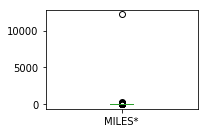

In [82]:
data.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey = False)
plt.show

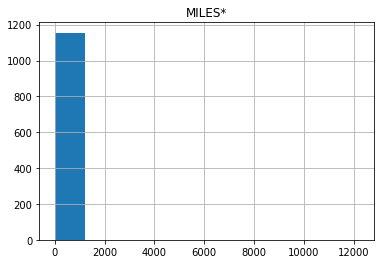

In [83]:
data.hist()
plt.show()

one of the interesting data point: commute has the longest travel time (300 +)

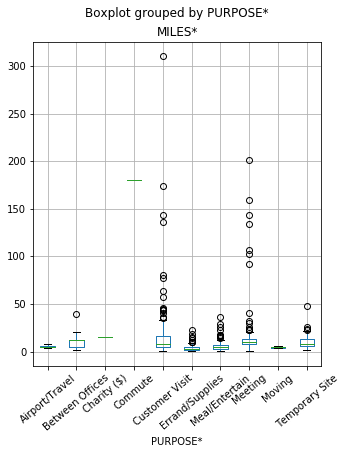

In [84]:
data.boxplot('MILES*', 'PURPOSE*', rot = 40, figsize = (5,6))

2.   Plotting Multivarite Plots



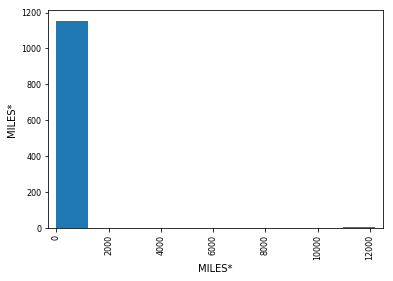

In [85]:
scatter_matrix(data)
plt.show()

missing (null) valuee, 507 from the dataset.
seems like the purpose of destination is the most that've got the most missing value. 

In [86]:
print(data.isnull().values.sum())

507


In [87]:
print(data.isnull().sum())

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64


In [0]:
#data = data.fillna(data['PURPOSE*'].value_counts().index[0])

In [0]:
#print(data.isnull().values.sum())

In [0]:
#print(data.info())

In [88]:
print(data['PURPOSE*'].value_counts())

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64


got 10 different purposes of travelling in this dataset

In [108]:
print(data['PURPOSE*'].isnull().value_counts())

False    653
True     503
Name: PURPOSE*, dtype: int64


In [0]:
#making a list of Unknown Purpose types for the PURPOSE* attribute
Unknown_Purpose = [""]
data = pd.read_csv("My Uber Drives - 2016.csv", na_values = Unknown_Purpose)

In [116]:
print(data['PURPOSE*'].value_counts('Unknown_Purpose').count())

10


In [94]:
print(data['START*'].value_counts('Unknown Location').count())

177


In [95]:
print(data['STOP*'].value_counts('Unknown Location').count())

188
